<a href="https://colab.research.google.com/github/elichen/adventofcode/blob/main/Day_17_Reservoir_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
data = """x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504""".split('\n')

In [134]:
data = [x.rstrip() for x in open("input.txt").readlines()]

In [135]:
import numpy as np

def parse_ranges(strings):
    # Parse the input strings to extract x and y ranges
    x_ranges = []
    y_ranges = []
    for string in strings:
        parts = string.split(', ')
        for part in parts:
            axis, range_ = part.split('=')
            if '..' in range_:
                start, end = map(int, range_.split('..'))
                range_list = list(range(start, end + 1))
            else:
                range_list = [int(range_)]

            if axis == 'x':
                x_ranges.extend(range_list)
            elif axis == 'y':
                y_ranges.extend(range_list)

    # Determine the size of the array
    min_x, max_x = min(x_ranges), max(x_ranges)
    min_y, max_y = min(y_ranges), max(y_ranges)
    width, height = max_x - min_x + 1, max_y - min_y + 1

    # Create the array and mark the cells
    array = np.zeros((height, width), dtype=int)
    for string in strings:
        parts = string.split(', ')
        for part in parts:
            axis, range_ = part.split('=')
            if '..' in range_:
                start, end = map(int, range_.split('..'))
            else:
                start = end = int(range_)

            if axis == 'x':
                x_start, x_end = start - min_x, end - min_x
            elif axis == 'y':
                y_start, y_end = start - min_y, end - min_y

        # Mark the cells in the array
        array[y_start:y_end + 1, x_start:x_end + 1] = 1

    return array, (min_x, min_y)

array, offsets = parse_ranges(data)

In [140]:
def simulate_water(array, x_offset, y_offset, start_x=500, start_y=-1):
    # Constants for cell types
    EMPTY, WALL, STILL_WATER, MOVING_WATER = 0, 1, 2, 3

    # Adjust start_x according to the offset
    start_x -= x_offset

    # Create a copy of the array to simulate on
    sim_array = np.copy(array)

    def can_move_to(x, y):
        """Check if the water can move to the given position."""
        if 0 <= y < sim_array.shape[0] and 0 <= x < sim_array.shape[1]:
            return sim_array[y, x] in [EMPTY, MOVING_WATER]
        return False

    def mark_still_water(x, y, initial_direction):
        """Mark still water from the current position to the left until a wall is encountered."""
        while 0 <= x < sim_array.shape[1] and sim_array[y, x] == MOVING_WATER:
            sim_array[y, x] = STILL_WATER
            x += initial_direction

    def drop_water(x, y, initial_direction):
        """Simulate a single drop of water."""
        direction = 0
        while True:
            if y >= sim_array.shape[0]-1:  # Drop has fallen off the array
                return

            if can_move_to(x, y + 1):  # Move down if possible
                y += 1
                direction = 0
            elif direction == 0:
                direction = initial_direction
            elif can_move_to(x + direction, y):
                x += direction
            else:
                direction = -direction
                if direction == initial_direction:
                    mark_still_water(x, y, initial_direction)
                    return

            sim_array[y, x] = MOVING_WATER  # Mark the cell as moving water

    # Simulate water drops
    initial_direction = -1  # Start with moving left
    while True:
        prev_array = np.copy(sim_array)
        drop_water(start_x, start_y, initial_direction)
        if np.array_equal(prev_array, sim_array):
          break
        initial_direction *= -1  # Alternate direction

    return sim_array

# Test the function with the array and offsets from earlier
new_array = simulate_water(array, *offsets)

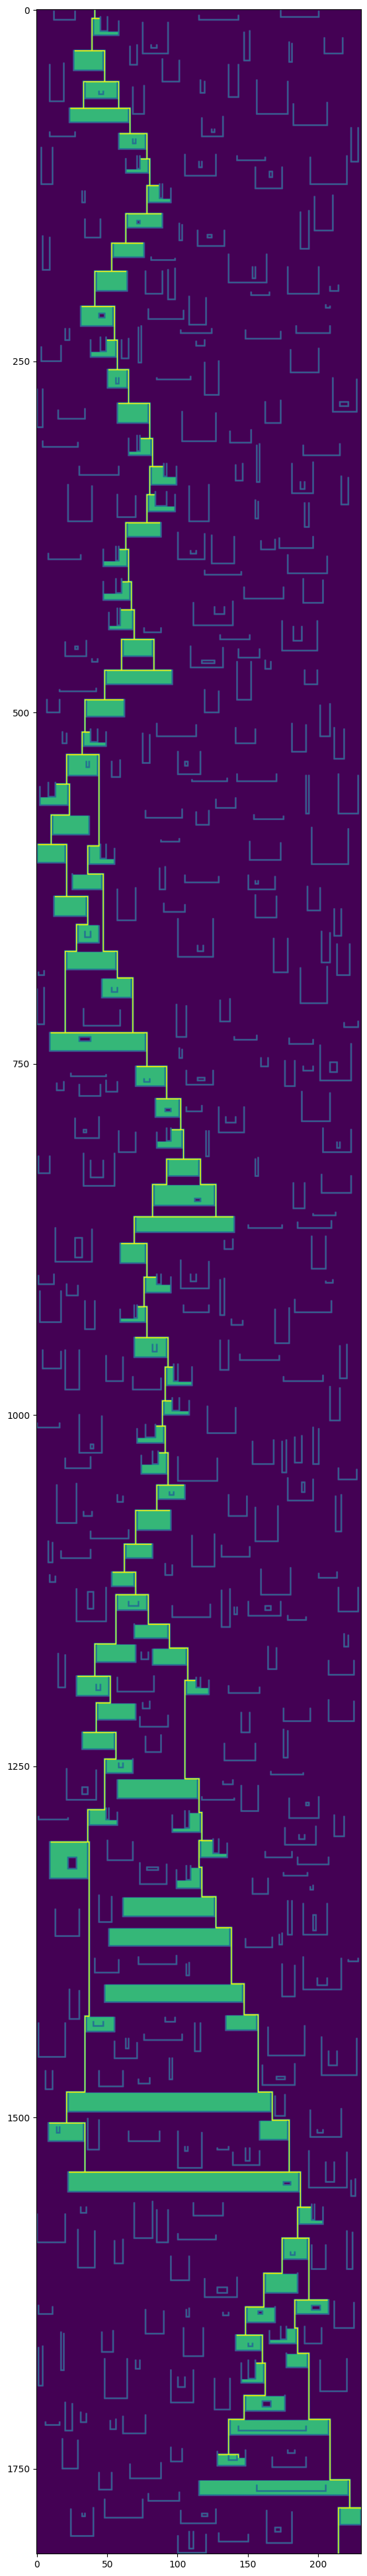

In [153]:
# Plotting the new array after the water simulation
plt.figure(figsize=(10, 50))
plt.imshow(new_array, cmap='viridis', origin='upper')
plt.show()

In [143]:
np.count_nonzero(new_array >= 2)

31088

In [ ]:
# 31088 too low